In [ ]:
!pip install cupy-cuda101

In [ ]:
!pip install livelossplot

In [ ]:
import numpy as np
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split

from bprH_gpu import bprH

%load_ext autoreload
%autoreload 2

In [ ]:
data = pd.read_csv("data/Sobazaar-bprh-cleaned.csv")

In [ ]:
# Here we only consider data with View
data = data[~(data.Action == "L")]
data.reset_index(inplace=True, drop=True)
data.drop_duplicates(inplace=True)

In [ ]:
original_item_list = sorted(set(data.ItemID))
original_user_list = sorted(set(data.UserID))

data_without_target = data[data.Action != 'P']
data_only_with_target = data[data.Action == 'P']

In [ ]:
d1, test_data = train_test_split(data_only_with_target,
                                 test_size=0.2,
                                 random_state=20200715
                                 )

train_data = pd.concat([d1, data_without_target])
train_data.reset_index(inplace=True,drop=True)
test_data.reset_index(inplace=True,drop=True)

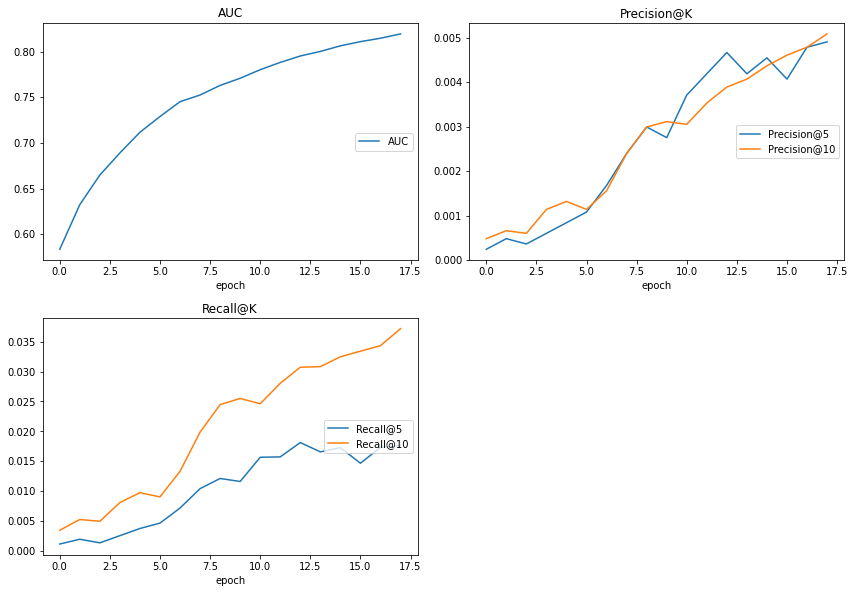

100%|██████████| 360000/360000 [5:50:45<00:00, 17.11it/s, est_changed=0.5186144190704137, len_I=1, len_J=1, len_K=12]

AUC
	AUC              	 (min:    0.584, max:    0.819, cur:    0.819)
Precision@K
	Precision@5      	 (min:    0.000, max:    0.005, cur:    0.005)
	Precision@10     	 (min:    0.000, max:    0.005, cur:    0.005)
Recall@K
	Recall@5         	 (min:    0.001, max:    0.018, cur:    0.018)
	Recall@10        	 (min:    0.003, max:    0.037, cur:    0.037)


In [ ]:
bprh_model = bprH(dim=50,
          omega=1000,
          rho=1,
          lambda_u=0.000001,
          lambda_v=0.000001,
          lambda_b=0.000001,
          gamma=0.1,
          random_state=20200715,
          num_iter=360000,
          existed_model_path=None)

bprh_model.fit(X=train_data,
               eval_X=test_data,
               original_item_list=original_item_list,
               original_user_list=original_user_list,
               coselection_saved_path='data/item-set-coselection-test.pkl',
               model_saved_path="bprh_soba.pkl",
               correlation=True,
               coselection=True,
               plot_metric=True,
               log_metric=True,
               iter_to_log=20000,
               iter_to_save=60000)

In [ ]:
scoring_list, p, r, auc = bprh_model.scoring(ground_truth=bprh_model.test_data,
                                      K=10,
                                      train_data_as_reference_flag=True)
print('Recall: test %.4f.' % r)
print('Precision: test %.4f.' % p)
print('AUC: test %.4f.' % auc)

Recall: test 0.0372.
Precision: test 0.0051.
AUC: test 0.8193.


In [ ]:
scoring_list, p, r, auc = bprh_model.scoring(ground_truth=bprh_model.train_data,
                                      K=10,
                                      train_data_as_reference_flag=False)
print('Recall: train %.4f.' % r)
print('Precision: train %.4f.' % p)
print('AUC: train %.4f.' % auc)

In [ ]:
bprh_model = bprH(dim=50,
          omega=1000,
          rho=1,
          lambda_u=0.000001,
          lambda_v=0.000001,
          lambda_b=0.000001,
          gamma=0.1,
          random_state=20200715,
          num_iter=720000,
          existed_model_path="bprh_soba.pkl_359999")

bprh_model.fit(X=train_data,
               eval_X=test_data,
               original_item_list=original_item_list,
               original_user_list=original_user_list,
               coselection_saved_path='data/item-set-coselection-test.pkl',
               model_saved_path="bprh_soba_0716.pkl",
               correlation=True,
               coselection=True,
               plot_metric=True,
               log_metric=True,
               iter_to_log=20000,
               iter_to_save=60000)

In [14]:
scoring_list, p, r, auc = bprh_model.scoring(ground_truth=bprh_model.test_data,
                                      K=10,
                                      train_data_as_reference_flag=True)
print('Recall: test %.4f.' % r)
print('Precision: test %.4f.' % p)
print('AUC: test %.4f.' % auc)

Recall: test 0.0636.
Precision: test 0.0084.
AUC: test 0.8694.


In [ ]:
bprh_model = bprH(dim=50,
          omega=1000,
          rho=1,
          lambda_u=0.000001,
          lambda_v=0.000001,
          lambda_b=0.000001,
          gamma=0.1,
          random_state=20200715,
          num_iter=720000,
          existed_model_path="bprh_soba_0716.pkl_359999")

bprh_model.fit(X=train_data,
               eval_X=test_data,
               original_item_list=original_item_list,
               original_user_list=original_user_list,
               coselection_saved_path='data/item-set-coselection-test.pkl',
               model_saved_path="bprh_soba_0716.pkl",
               correlation=True,
               coselection=True,
               plot_metric=True,
               log_metric=True,
               iter_to_log=20000,
               iter_to_save=60000)